#計算機程式設計二
#第四週上課內容

## 主題：Binary Trees

###GitHub 教材參考資料

[i2p-nthu 程式設計二 Binary Trees](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%BA%8C/mid1/4-binary_tree.md)





這份講義想要解釋 binary tree 範例。

用下圖的 binary tree 當作例子。最上面的 `Node` 叫做 root，然後長出左右兩個分支，兩個分支各自也都具備 binary tree 的結構。我們假設每個 `Node` 裡面放的數字都不相同。

root node 根節點

internal node

leaf node （末梢，沒有分支，沒有子樹）

subtree 子樹

child node

```
             2
          /     \
         7       5   
        /  \      \
      3      6     9
            / \     \
           8   11    4   

```      

如果我們採用某種規則，依照一定的順序走過每個 `Node`，會得到一個序列。

## in-order
譬如，從 root (裡面放的數字是 2) 開始，如果我們每次都先走左邊的分支，然後一路向下，直到左邊的分支的全部的`Node`都被走過，接著才走中間的 2，然後才繼續將右邊分支全走過，這樣得到的序列順序稱作 in-order，得到的序列會像底下這樣：

```
3 7 8 6 11 2 5 9 4
```

用遞迴的觀點來看，問題可以拆解成
1. 用 in-order 方式走過左邊以`7`為 root 的分支
2. 走過 root `2`
3. 用 in-order 方式走過右邊以`5`為 root 的分支

接下來，以`7`為 root 的分支，如果要繼續用 in-order 方式走過，一樣是
1. 用 in-order 方式走過左邊以`3`為 root 的分支
2. 走過 root `7`
3. 用 in-order 方式走過右邊以`6`為 root 的分支

如此不斷進行下去，直到碰到某個末梢 (稱作 leaf)，就不用再繼續下去。以這個例子來說，最早被走到的 leaf 是 `3`。

總之，只要每次都遵守 *左 中 右* 的原則，全部左邊的分支都走過，才可以走中間，然後才可以走右邊分支，如此就可以列出 in-order 的序列。

##pre-order
還有一種走法叫做 pre-order，每次都是先走中間的 `Node`，然後才把左邊的分支整個走過，接著才將右邊的分支整個走過。得到的序列會像底下這樣
```
2 7 3 6 8 11 5 9 4
```

##從 pre-order 和 in-order 建構出 binary tree
前面已經看過，對於任一個 binary tree，我們可以列出 in-order 和 pre-order 序列。如果是反過來呢？ 假設已知 in-order 序列，或是已知 pre-order 序列，能否決定 binary tree 的長相？
事實上，如果只知道 in-order 或 pre-order，並無法決定唯一可能的 binary tree 結構。但是如果同時給了 in-order 和 pre-order 序列，而且每個 `Node` 編號 (或是資料）都不相同，則一定可以決定出唯一的 binary tree 該長成甚麼樣子。我們試著寫程式來完成這項任務。

首先要讀取 pre-order 和 in-order 序列。從 pre-order 的第一個數，可以知道如何將 in-order 序列分成左右兩段。例如
```
  pre-order: 2 7 3 6 8 11 5 9 4
  in-order:  3 7 8 6 11 2 5 9 4
```

我們知道 pre-order 的第一個數 `2` 就是 root。接著就可以把 in-order 序列以 `2` 為分隔點，分成 `3 7 8 6 11` 以及 `5 9 4` 兩段。
```
	pre-order:   7 3 6 8 11 5 9 4
	in-order left: 3 7 8 6 11
	in-order right: 5 9 4
```

先從左邊開始，所以接下來的問題會變成
```
	pre-order: 7 3 6 8 11 5 9 4
	in-order:  3 7 8 6 11
```

然後從 pre-oreder 的第一個數 `7`，我們知道要把 in-order 序列分成 `3` 和 `8 6 11`
```
	pre-order:   3 6 8 11 5 9 4
	in-order left: 3
	in-order right: 8 6 11
```

繼續走左邊，問題變成
```
	pre-order:   3 6 8 11 5 9 4
	in-order:  3
```

這時候就可以建出一個 leaf `Node`，裡面放的數字是 `3`。然後，回到上一層，處理右邊
```
	pre-order:  6 8 11 5 9 4
	in-order:  8 6 11
```

這時候 pre-order 第一個數是 `6`，分兩段變成
```
	pre-order:     8 11 5 9 4
	in-order left : 8
	in-order right 11
```

如此繼續做下去，最終我們可以把 pre-order 和 in-order 的每個數都看過一遍，而且可以依照對應的順序，把 binary tree 建構起來。

In [ ]:
%%writefile build_binary_tree.c
#include <stdio.h>
#include <stdlib.h>

typedef struct _Node {
  int val;
  struct _Node *left;
  struct _Node *right;
} Node;

Node * create_node(int x)
{
    Node *np = (Node *) malloc(sizeof(Node));
    np->val = x;
    np->left = NULL;
    np->right = NULL;
    return np;
}

int find(int v, int *in, int si, int ei)
{
  while (si <= ei) {
    if (in[si] == v) {
      return si;
    }
    si++;
  }
  return ei;
}

void delete_tree(Node* tr)
{
  if (tr) {
    delete_tree(tr->left);
    delete_tree(tr->right);
    printf("%d killed\n", tr->val);
    free(tr);
  }
}

Node * build_tree(int* pre, int* in, int idx, int si, int ei)
{
  Node *p;
  int fi;
  if (si > ei) {
    return NULL;
  } else {
    /*
    pre-order:  2 7 3 6 8 11 5 9 4
                si         fi      ei
    in-order:   3 7 8 6 11  2  5 9 4
    in-order left: 3 7 8 6 11
    in-order right: 5 9 4
    */
    fi = find(pre[idx], in, si, ei);
    //printf("fi: %d\n", fi);
    p = create_node(pre[idx]);
    p->left  = build_tree(pre, in, idx+1,        si, fi-1);
    p->right = build_tree(pre, in, idx+fi-si+1,  fi+1, ei);
    return p;
  }
}

void show_in_order(Node *tr)
{
  if (tr) {
    show_in_order(tr->left);
    printf("%d ", tr->val);
    show_in_order(tr->right);
  }
}

void show_pre_order(Node *tr)
{
  if (tr) {
    printf("%d ", tr->val);
    show_pre_order(tr->left);
    show_pre_order(tr->right);
  }
}

void show_post_order(Node *tr)
{
  if (tr) {
    show_post_order(tr->left);
    show_post_order(tr->right);
    printf("%d ", tr->val);
  }
}

void print_node(FILE *fout, Node *tr)
{
  static int neg = -1;
  if (tr) {
    if (tr->left == NULL) {
      fprintf(fout, "%d -> %d;\n", tr->val, neg);
      neg--;
    } else {
      fprintf(fout, "%d -> %d;\n", tr->val, tr->left->val);
    }
    if (tr->right == NULL) {
      fprintf(fout, "%d -> %d;\n", tr->val, neg);
      neg--;
    } else {
      fprintf(fout, "%d -> %d;\n", tr->val, tr->right->val);
    }
    print_node(fout, tr->left);
    print_node(fout, tr->right);
  }
}

void write_gv(Node *tr)
{
  FILE* fout = fopen("tree.gv", "w");
  fprintf(fout, "digraph T {\n");
  print_node(fout, tr);
  fprintf(fout, "}\n");
  fclose(fout);
}

int find_max(Node *tr)
{
  int a, b, max;
  if (tr) {
    max = tr->val;
    a = find_max(tr->left);
    b = find_max(tr->right);
    max = ((max > a) ? max : a);
    return ((max > b) ? max : b);
  } else {
    return 0;
  }
}

int main(void)
{
  int *pre;
  int *in;
  int N, i;
  Node *tr;

  scanf("%d", &N);
  pre = (int*) malloc(sizeof(int)*N);
  in = (int*)  malloc(sizeof(int)*N);

  for (i=0; i<N; ++i) {
    scanf("%d", &pre[i]);
  }

  for (i=0; i<N; ++i) {
    scanf("%d", &in[i]);
  }


  tr = build_tree(pre, in, 0, 0, N-1);
  /*
  tr = create_node(2);
  tr->left = create_node(7);
  tr->right = create_node(5);
  tr->left->left = create_node(3);
  tr->left->right = create_node(6);
  //pre-order: 2 7 3 6 8 11 5 9 4
  //in-order:  3 7 8 6 11 2 5 9 4

  */


  show_pre_order(tr);
  printf("\n");

  show_in_order(tr);
  printf("\n");

  show_post_order(tr);
  printf("\n");

  write_gv(tr);

  printf("%d\n", find_max(tr));

  delete_tree(tr);
  tr = NULL;


  return 0;
}


Overwriting build_binary_tree.c


In [ ]:
%%shell
gcc -o build_binary_tree build_binary_tree.c
./build_binary_tree

9
2 7 3 6 8 11 5 9 4
3 7 8 6 11 2 5 9 4
2 7 3 6 8 11 5 9 4 
3 7 8 6 11 2 5 9 4 
3 8 11 6 7 4 9 5 2 
11
3 killed
8 killed
11 killed
6 killed
7 killed
4 killed
9 killed
5 killed
2 killed


In [ ]:
!cat tree.gv

digraph T {
2 -> 7;
2 -> 5;
7 -> 3;
7 -> 6;
3 -> -1;
3 -> -2;
6 -> 8;
6 -> 11;
8 -> -3;
8 -> -4;
11 -> -5;
11 -> -6;
5 -> -7;
5 -> 9;
9 -> -8;
9 -> 4;
4 -> -9;
4 -> -10;
}


In [ ]:
%%writefile E05_01.c
#include <stdio.h>
#include <stdlib.h>
#define MIN -1000000
#define N 100
int in_seq[N];
int pre_seq[N];

typedef struct t_node {
    int num;
    struct t_node *left;
    struct t_node *right;
} Node;

Node *new_node(int num)
{
    Node *p = (Node *) malloc(sizeof(Node));
    p->num = num;
    p->left = NULL;
    p->right = NULL;
    return p;
}

void in_order(Node *root)
{
    if (root) {
        in_order(root->left);
        printf(" %d ", root->num);
        in_order(root->right);
    }
}

void pre_order(Node *root)
{
    if (root) {
        printf(" %d ", root->num);
        pre_order(root->left);
        pre_order(root->right);
    }
}

void post_order(Node *root)
{
    if (root) {
        post_order(root->left);
        post_order(root->right);
        printf(" %d ", root->num);
    }
}

int find_in_seq(int start, int end, int num) {
    while (start <= end) {
      if (in_seq[start] == num) {
          return start;
      }
      start++;
    }
    return 0;
}

/*
        start                                   end
        cur                      idx
        [0]  [1]  [2]  [3]  [4]  [5]  [6]  [7]  [8]
pre-seq: 2    7    3    6    8   11    5    9    4
in-seq:  3    7    8    6   11    2    5    9    4
*/

Node * build_tree(int start, int end)
{
    static int cur;
    if (start > end) return NULL;
    Node *p = new_node(pre_seq[cur]);
    cur++;
    if (start<end) {
        int idx = find_in_seq(start, end, p->num);
        p->left = build_tree(start, idx-1);
        p->right = build_tree(idx+1, end);
    }
    return p;
}

void delete_tree(Node *p)
{
    if (p!=NULL) {
        delete_tree(p->left);
        delete_tree(p->right);
        free(p);
    }
}

int find_max(Node *p)
{
    if (p!=NULL) {
        int left_max = find_max(p->left);
        if (left_max < p->num) {
            left_max  = p->num;
        }
        int right_max = find_max(p->right);
        return (left_max > right_max) ? left_max : right_max;
    } else {
        return MIN;
    }
}

void print_tree(FILE *fout, Node *p)
{
    static int dummy_node = -1;

    if (p != NULL) {
        if (p->left != NULL) {
          fprintf(fout, "%d -> %d;\n", p->num, p->left->num);
          print_tree(fout, p->left);
        } else {
          fprintf(fout, "%d -> %d;\n", p->num, dummy_node--);
        }
        if (p->right != NULL) {
          fprintf(fout, "%d -> %d;\n", p->num, p->right->num);
          print_tree(fout, p->right);
        } else {
          fprintf(fout, "%d -> %d;\n", p->num, dummy_node--);
        }
    }
}
void write_gv(Node *tree, char *filename)
{
    FILE *fout = fopen(filename, "w");
    fprintf(fout, "digraph T {\n");
    print_tree(fout, tree);
    fprintf(fout, "}\n");
}

int main(void)
{
    Node *root;
    int i, n;

    scanf("%d", &n);
    for (i=0; i<n; ++i) {
      scanf("%d", &pre_seq[i]);
    }

    for (i=0; i<n; ++i) {
      scanf("%d", &in_seq[i]);
    }

    root = build_tree(0, n-1);


    pre_order(root);
    printf("\n");

    in_order(root);
    printf("\n");

    post_order(root);
    printf("\n");

    printf("max: %d\n", find_max(root));


    write_gv(root, "tree.gv");

    delete_tree(root);
    root = NULL;


    return 0;
}

Overwriting E05_01.c


In [ ]:
%%shell
gcc -o E05_01 E05_01.c
./E05_01

9
2 7 3 6 8 11 5 9 4
3 7 8 6 11 2 5 9 4
 2  7  3  6  8  11  5  9  4 
 3  7  8  6  11  2  5  9  4 
 3  8  11  6  7  4  9  5  2 
max: 11


In [ ]:
!cat ./tree.gv

digraph T {
2 -> 7;
7 -> 3;
3 -> -1;
3 -> -2;
7 -> 6;
6 -> 8;
8 -> -3;
8 -> -4;
6 -> 11;
11 -> -5;
11 -> -6;
2 -> 5;
5 -> -7;
5 -> 9;
9 -> -8;
9 -> 4;
4 -> -9;
4 -> -10;
}


##寫程式

###先定好 binary tree 所需的基本資料結構
```
typedef struct t_node {
    int data;
    struct t_node *left, *right;
} Node;
```

每個 `Node` 裡面放的是整數。接下來就可以寫函數 `newNode`，用來產生一個新的 `Node`。
```
Node* newNode(int val)
{
    Node *node = (Node *) malloc(sizeof(Node));
    node->data = val;
    node->left = node->right = NULL;
     return node;
}
```

接下來先看 `main` 裡面需要做哪些事
```
int main(void)
{
    int *in, *pre, n, i;
    scanf("%d", &n); // get the size of tree
    in = (int *) malloc(n * sizeof(int)); //allocate space for inorder
    pre = (int *) malloc(n * sizeof(int)); // allocate space for preorder
    
    for(i=0; i<n; i++) // read in inorder
        scanf("%d", &in[i]);
    
    for(i=0; i<n; i++) // read in pre-order
        scanf("%d", &pre[i]);
    
    Node *root = constructTree(in, pre, 0, n-1); // construct trr
    printf("%d\n", maxValue(root)); // print the max value of the tree
    
    writeGV(root);
    
    inorder(root);
    printf("\n");
    postorder(root);
    
    destroyTree(root);// clean up
    free(in);
    free(pre);
    
    return 0;
}
```
對照註解的說明，首先是讀取序列的長度 `n`，然後分別用`malloc`動態地產生兩個整數陣列 `in` 和 `pre`，用來存放 in-order 和 pre-order 序列。

接下來則是呼叫 `constructTree(in, pre, 0, n-1)` 函數，提供 `in` 和 `pre` 兩個陣列，以及陣列的開頭和最後的元素編號 (index)，用遞迴方式將 binary tree 建構出來。

有了 binary tree 之後，就可以呼叫 `maxValue(root)` 把 binary tree 的 root 傳入，然後找出整個 binary tree 裡面最大的值是多少。

上述的 `constructTree` 和 `maxValue` 函數，都要自己練習實作。另外我們也要寫出`writeGV`函數，用來輸出 binary tree 的描述檔，之後可以用 Graphviz 工具，將描述檔轉成 png 圖檔，就可以看到視覺化後的 binary tree 圖形，這份講義的最前面的圖案就是用這個方式產生。

接著呼叫 `inorder(root)` 和 `postorder(root)`，反過來從 binary tree 生成， in-order 和 post-order 序列。其中，post-order 序列顧名思義，是以 **左 右 中** 的順序，將 binary tree 走完，用同樣的例子來說明，post-order 序列會是
```
	3 8 11 6 7   4 9 5   2
```

程式最後要呼叫 `destroyTree(root)` 把 binary tree 砍掉，而且也要呼叫 `free`，把當初用 `malloc` 產生的 `in` 和 `pre` 兩個陣列。



底下我們就一一檢視上述需要用到的函數。

###從 in-order 和 pre-order 序列長出 binary tree
```
// 傳入 preorder 和 inorder 序列，以及在 inorder 序列中目前要檢查的範圍
// preorder 或 inorder 序列，都不能有重複的數
Node* constructTree(int inorder[], int preorder[], int inorder_start, int inorder_end)
{
    static int preorder_idx = 0; // 必須記得上一次 讀取 preorder 的位置在哪裡
    if(inorder_start > inorder_end)
        return NULL;
    
    Node *tree_node = newNode(preorder[preorder_idx++]);
    if(inorder_start == inorder_end)
        return tree_node;
    
    int inorder_idx =
      idxSearch(inorder, inorder_start, inorder_end, tree_node->data);
            
    tree_node->left =
      constructTree(inorder, preorder, inorder_start, inorder_idx-1);
    tree_node->right =
      constructTree(inorder, preorder, inorder_idx+1, inorder_end);
    
    return tree_node;
}
```

傳入的參數 `inorder_start` 和 `inorder_end`，用來標記目前要處理的是整個序列的哪一段。
至於 `preorder_idx` 則是一個 `static` 變數，不會因為函數呼叫結束就消失，所以會標記目前 pre-order 序列要檢查的是哪一個數，也就是目前用來將 in-order 序列分成左右的數，pre-order 序列一定是從左到右依序檢查。

`tree_node` 指標所記錄的記憶體位置，是透過呼叫 `newNode` 產生的一個新的 `Node` 的位址，裡面放的數字是 `preorder[preorder_idx]`。假如 `inorder_start==inorder_end`，表示已經走到 leaf，這時候就可以把指標變數 `tree_node` 所記錄的位址傳回去。

如果 `inorder_start` 小於 `inorder_end`，表示底下接的還是一個小的 binary tree，這時候就要用剛才存入 `tree_node->data` 的數，當作分界，找出那個數在 in-order 序列中的位置，然後把 in-order 序列分成兩半。搜尋位置是透過呼叫 `idxSearch` 來完成。
```
int idxSearch(int arr[], int start, int end, int value)
{
    int i;
    for (i = start; i <= end; i++)
    {
        if (arr[i] == value)
            return i;
    }
    return -1;
}
```

找到之後把位置存在 `inorder_idx` 變數中。然後分別遞迴呼叫 `constructTree`，長出左右兩個分支。請注意傳入的起始和終止位置。
```
tree_node->left = constructTree(inorder, preorder, inorder_start, inorder_idx-1);
```
```
tree_node->right = constructTree(inorder, preorder, inorder_idx+1, inorder_end);
```

兩個遞迴都結束之後，`tree_node` 就會指向一個基於目前處理的 in-order 序列範圍內所對應的 binary tree，最後把 `tree_node` 傳回去就完成了。



###把樹砍掉
```
void destroyTree(Node *root)
{
    if(root != NULL)
    {
        destroyTree(root->left);
        destroyTree(root->right);
        free(root);
    }
}
```
也是用遞迴呼叫來達成。


##找最大值
```
int maxValue(Node *tree)
{
    if (tree != NULL)
    {
        int maxval = tree->data;
        if (tree->left!=NULL) {
            int tmp = maxValue(tree->left);
            if (maxval<tmp) maxval = tmp;
        }
        if (tree->right!=NULL) {
            int tmp = maxValue(tree->right);
            if (maxval<tmp) maxval = tmp;
        }
        return maxval;
    } else return -1;
}
```

想要找最大值，binary tree 至少要有一個 `Node` 才行，所以如果傳入的指標 `tree` 是 `NULL`，就不能做任何事，只能隨便傳回一個數，例如 `-1`，或是 `INT_MIN` (必須 `#include <limits.h>`)。假如 `tree` 不是 `NULL`，則做底下三件事：
1. 先假設目前的 `tree->data` 就是最大的數；
2. 如果左邊分支有東西，就遞迴呼叫 `tmp = maxValue(tree->left);` 找出其中最大的數，如果發現左邊最大的那個數，比目前假設最大的數還大，就更新；
3. 如果右邊分支有東西，就遞迴呼叫 `tmp = maxValue(tree->left);` 找出其中最大的數，如果發現右邊最大的那個數，比目前已知最大的數還大，就更新。

##從 binary tree 生成 in-order 和 post-order 序列
```
void inorder(Node *root)
{
    if (root != NULL) {
        inorder(root->left);
        printf("%d ", root->data);
        inorder(root->right);
    }
}
void postorder(Node *root)
{
    if (root != NULL) {
        postorder(root->left);
        postorder(root->right);
        printf("%d ", root->data);
    }
}
```

這兩件事很容易達成，關鍵在於遞迴呼叫以及 `printf` 的順序。如果是 in-order 序列，就依照 **左 中 右** 的順序，如果是 post-order 序列，則依照 **左 右 中** 的順序。

##視覺化

最後我們要試著利用現成的工具，產生 binary tree 圖片。

先到底下的網址，下載所需的軟體 graphviz：
http://www.graphviz.org/Download.php

安裝完之後，就可以使用 GVEdit 程式。這個程式可以把 DOT 格式的文字檔，轉成對應的 graph 圖檔。

假設我們產生了一個如下的 DOT 檔案，
```
	digraph T {
		2 -> 7;
		2 -> 5;
		7 -> 3;
		7 -> 6;
		6 -> 8;
		6 -> 11;
		5 -> 9;
		9 -> 4;
	}
```
使用 GVEdit 程式就可以把上面的 binary tree 描述檔，轉成圖片

所以我們只要寫程式，依照 binary tree 的長相，產生上述的 DOT 描述檔就行了，底下的兩個函數就是在做這件事。
```
void printTree(FILE *fout, Node *tree)
{
    if (tree!=NULL) {
        if (tree->left!=NULL)
            fprintf(fout, "%d -> %d;\n", tree->data, tree->left->data);
        if (tree->right!=NULL)
            fprintf(fout, "%d -> %d;\n", tree->data, tree->right->data);
        printTree(fout, tree->left);
        printTree(fout, tree->right);
    }
}

void writeGV(Node *tree)
{
    FILE *fout = fopen("tree.gv", "w");
    fprintf(fout, "digraph T {\n");
    printTree(fout, tree);
    fprintf(fout, "}\n");
}
```

如果是 Mac OS，可以透過 `brew install graphviz` 安裝。如果要將 .gv 檔案轉成圖檔，只需要用
`dot -Tpng tree.gv > tree.png`

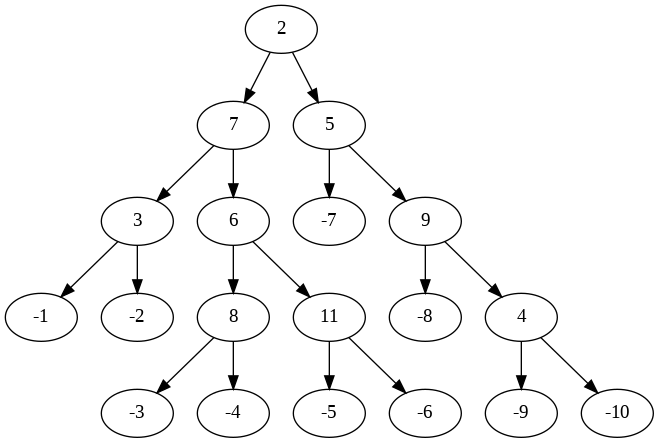

In [ ]:
!apt -qqq install graphviz
!dot -Tpng tree.gv > tree.png
from IPython.display import Image
Image('tree.png')